In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import os
plt.style.use( 'seaborn-v0_8-white')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
# for dirname, _, filenames in os.walk('../input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
df=pd.read_csv('../input/heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.rename(columns={'HeartDisease':'HeartFailure'},inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df_bk=df.copy()

In [8]:
df.shape

(918, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartFailure    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartFailure      0
dtype: int64

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
correlation = df.corr(numeric_only=True, method='spearman')

<Axes: >

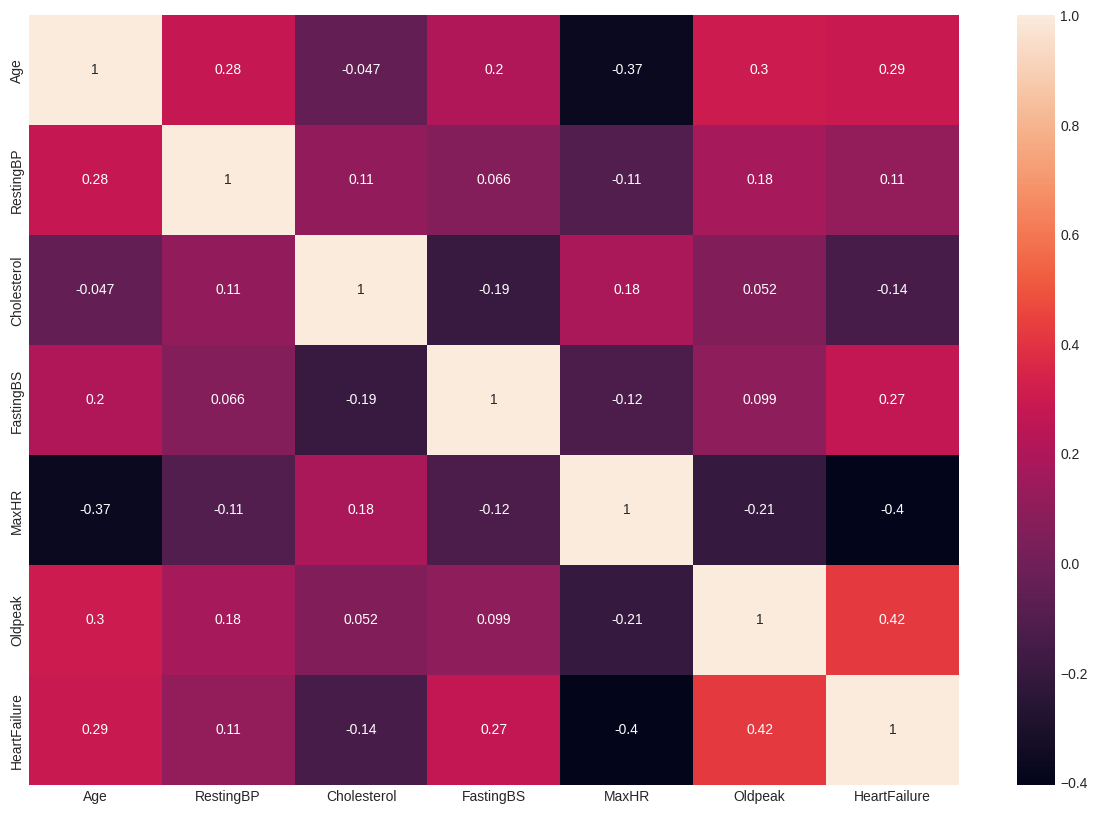

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

#### Heart Failure Analysis Based on Sex

In [14]:
df[df['HeartFailure']==1].Sex.value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

In [15]:
px.pie(df,values='HeartFailure',names='Sex',color='Sex',color_discrete_map={'F':'Pink','M':'Skyblue'},template='seaborn',title='Heart Failure On Gender Basis')

### Heart Failure Analysis Based on Age

In [21]:
px.scatter(df,x='Age',y='MaxHR',color='Sex',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate','Sex':'sex'},template='ggplot2',opacity=0.8,color_discrete_map={'F':'Pink','M':'skyblue'},title='Age Vs HeartRate')

### Heart Rate Analysis Based on Blood Pressure

In [24]:
px.scatter(df,x='RestingBP',y='MaxHR',color='Sex',size='MaxHR',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},template='ggplot2',opacity=0.8,color_discrete_map={'F':'Pink','M':'skyblue'},title='BloodPressure Vs HeartRate')

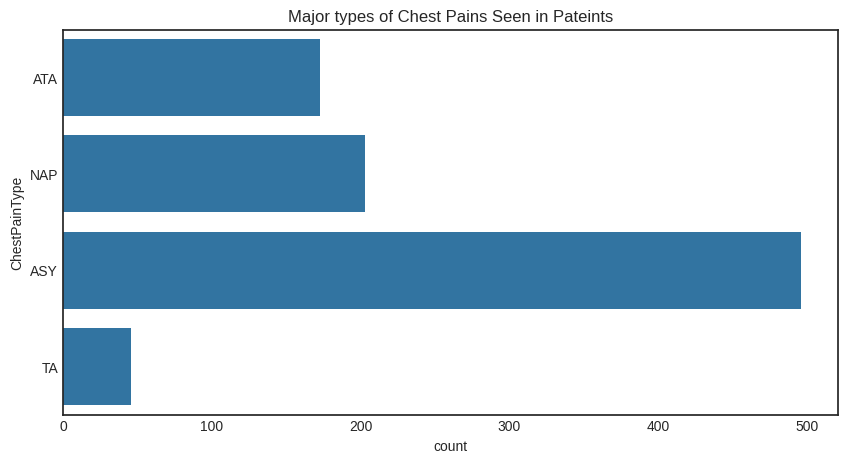

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['ChestPainType'])
plt.title('Major types of Chest Pains Seen in Pateints')
plt.show()

#### Chest Pain Analysis Based on Heart Rate

In [26]:
px.violin(df,x='ChestPainType',y='MaxHR',color='ChestPainType',labels={'MaxHR':'HeartRate'},template='ggplot2',title='ChestPainType Vs HeartRate')

In [32]:
px.scatter(df,x='Age',y='MaxHR',color='ChestPainType',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='ggplot2',opacity=1,color_discrete_sequence=px.colors.sequential.Darkmint,title='ChestPainType Vs HeartRate')

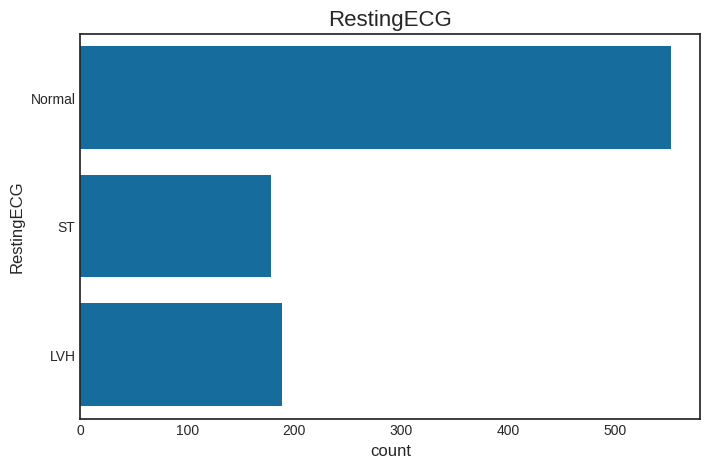

In [133]:
plt.figure(figsize=(8,5))
sns.countplot(df['RestingECG'])
plt.title('RestingECG')
plt.show()

In [33]:
px.violin(df,x='RestingECG',y='MaxHR',color='RestingECG',labels={'MaxHR':'HeartRate'},template='ggplot2',title='RestingECG Vs HeartRate')

In [35]:
px.scatter(df,x='Age',y='MaxHR',color='RestingECG',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='ggplot2',opacity=1,color_discrete_sequence=px.colors.sequential.Darkmint,title='RestingECG Vs HeartRate')

#### Slope of Peak Exercise ST Segment

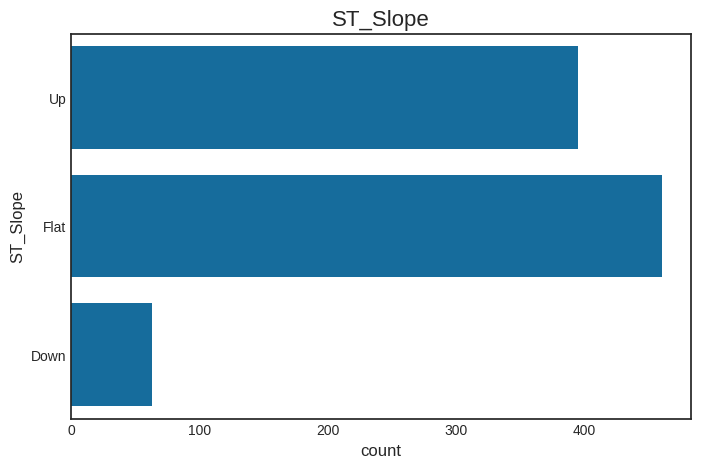

In [136]:
plt.figure(figsize=(8,5))
sns.countplot(df['ST_Slope']) 
plt.title('ST_Slope')
plt.show()

In [38]:
px.violin(df,x='ST_Slope',y='MaxHR',color='ST_Slope',labels={'MaxHR':'HeartRate'},template='ggplot2',title='ST_Slope Vs HeartRate',color_discrete_sequence=px.colors.sequential.Darkmint)

In [37]:
px.scatter(df,x='RestingBP',y='MaxHR',color='ST_Slope',size='MaxHR',template='ggplot2',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},opacity=0.9,color_discrete_sequence=px.colors.sequential.Darkmint,title='ST_Slope Vs HeartRate')

In [39]:
px.violin(df,x='HeartFailure',y='MaxHR',color='HeartFailure',labels={'MaxHR':'HeartRate'},template='ggplot2',color_discrete_sequence=px.colors.sequential.Darkmint,title='HeartFailure Vs HeartRate')

In [40]:
px.scatter(df,x='Oldpeak',y='Age',color='HeartFailure',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='ggplot2',opacity=0.8,color_discrete_sequence=px.colors.sequential.Darkmint,title='Oldpeak VS HeartFailure')

In [41]:
px.scatter(df,x='RestingBP',y='MaxHR',color='HeartFailure',size='MaxHR',template='ggplot2',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},opacity=0.8,color_discrete_sequence=px.colors.sequential.Darkmint,title='HeartRate and BloodPressure VS HeartFailure')

In [42]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())
        print(df[col].value_counts())

Sex
['M' 'F']
Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
['Normal' 'ST' 'LVH']
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
['N' 'Y']
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
['Up' 'Flat' 'Down']
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col]) 

In [145]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [46]:
x=df.drop('HeartFailure',axis=1)
y=df['HeartFailure']

## Heart Failure Prediction

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((642, 11), (276, 11), (642,), (276,))

In [48]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [58]:
Test={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}

In [59]:
result=pd.DataFrame(Test)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[136  28]
 [ 11 101]]
Outcome values : 
 136 28 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.83      0.87       164
           0       0.78      0.90      0.84       112

    accuracy                           0.86       276
   macro avg       0.85      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

Accuracy : 85.9 %
Precision : 92.5 %
Recall : 82.9 %
F1 Score : 0.875
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 86.5 %
MCC : 0.719
roc_auc_score: 0.866


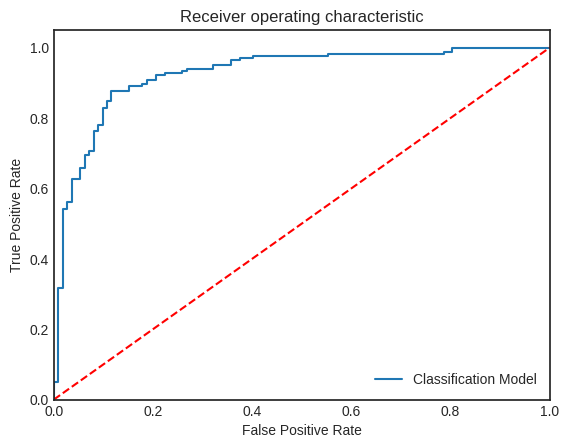

--------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[114  50]
 [ 28  84]]
Outcome values : 
 114 50 28 84
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.70      0.75       164
           0       0.63      0.75      0.68       112

    accuracy                           0.72       276
   macro avg       0.71      0.72      0.71       276
weighted avg       0.73      0.72      0.72       276

Accuracy : 71.7 %
Precision : 80.3 %
Recall : 69.5 %
F1 Score : 0.745
Specificity or True Negative Rate : 75.0 %
Balanced Accuracy : 72.2 %
MCC : 0.437
roc_auc_score: 0.723


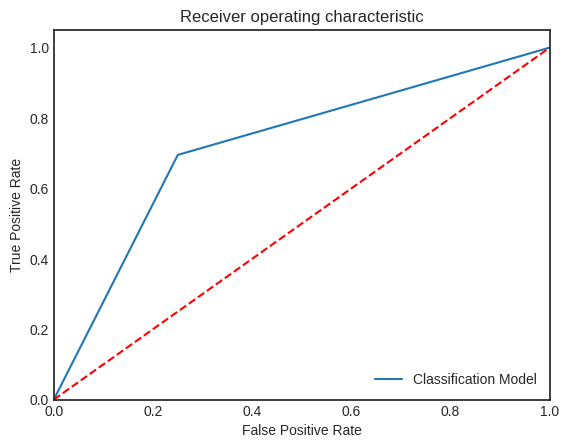

--------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[145  19]
 [ 12 100]]
Outcome values : 
 145 19 12 100
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90       164
           0       0.84      0.89      0.87       112

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

Accuracy : 88.8 %
Precision : 92.4 %
Recall : 88.4 %
F1 Score : 0.903
Specificity or True Negative Rate : 89.3 %
Balanced Accuracy : 88.9 %
MCC : 0.77
roc_auc_score: 0.889


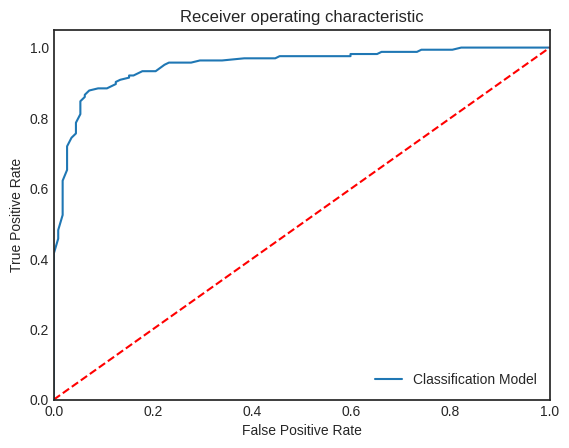

--------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[143  21]
 [ 11 101]]
Outcome values : 
 143 21 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.87      0.90       164
           0       0.83      0.90      0.86       112

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276

Accuracy : 88.4 %
Precision : 92.9 %
Recall : 87.2 %
F1 Score : 0.899
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 88.7 %
MCC : 0.765
roc_auc_score: 0.887


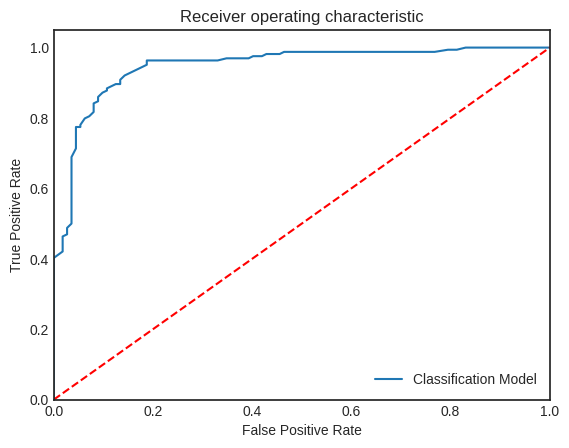

--------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[137  27]
 [ 13  99]]
Outcome values : 
 137 27 13 99
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.84      0.87       164
           0       0.79      0.88      0.83       112

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

Accuracy : 85.5 %
Precision : 91.3 %
Recall : 83.5 %
F1 Score : 0.873
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 85.9 %
MCC : 0.709
roc_auc_score: 0.86


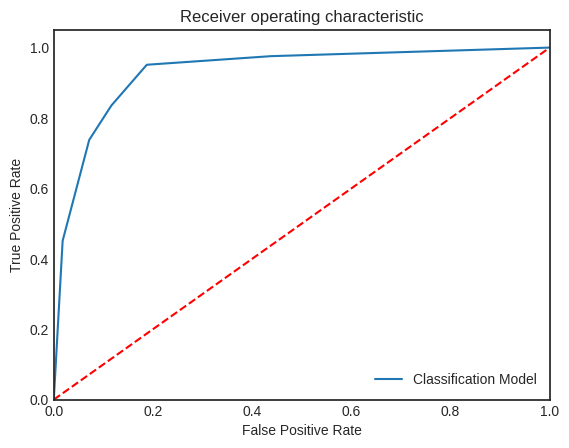

--------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[148  16]
 [ 15  97]]
Outcome values : 
 148 16 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.90      0.91       164
           0       0.86      0.87      0.86       112

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276

Accuracy : 88.8 %
Precision : 90.8 %
Recall : 90.2 %
F1 Score : 0.905
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 88.4 %
MCC : 0.767
roc_auc_score: 0.884


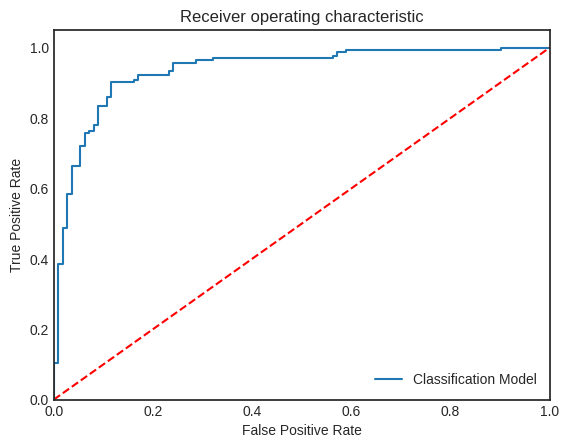

--------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[137  27]
 [ 20  92]]
Outcome values : 
 137 27 20 92
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.84      0.85       164
           0       0.77      0.82      0.80       112

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

Accuracy : 83.0 %
Precision : 87.3 %
Recall : 83.5 %
F1 Score : 0.854
Specificity or True Negative Rate : 82.1 %
Balanced Accuracy : 82.8 %
MCC : 0.651
roc_auc_score: 0.828


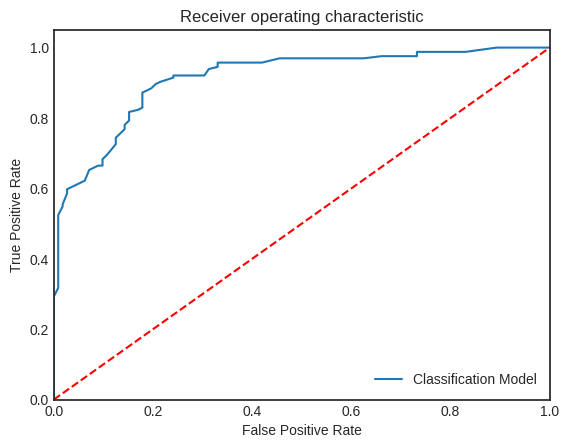

--------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[130  34]
 [ 10 102]]
Outcome values : 
 130 34 10 102
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.79      0.86       164
           0       0.75      0.91      0.82       112

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.86      0.84      0.84       276

Accuracy : 84.1 %
Precision : 92.9 %
Recall : 79.3 %
F1 Score : 0.855
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 85.2 %
MCC : 0.691
roc_auc_score: 0.852


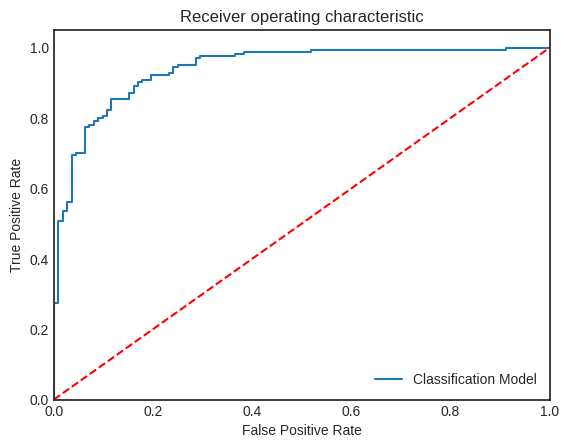

--------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[149  15]
 [ 25  87]]
Outcome values : 
 149 15 25 87
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.91      0.88       164
           0       0.85      0.78      0.81       112

    accuracy                           0.86       276
   macro avg       0.85      0.84      0.85       276
weighted avg       0.85      0.86      0.85       276

Accuracy : 85.5 %
Precision : 85.6 %
Recall : 90.9 %
F1 Score : 0.882
Specificity or True Negative Rate : 77.7 %
Balanced Accuracy : 84.3 %
MCC : 0.697
roc_auc_score: 0.843


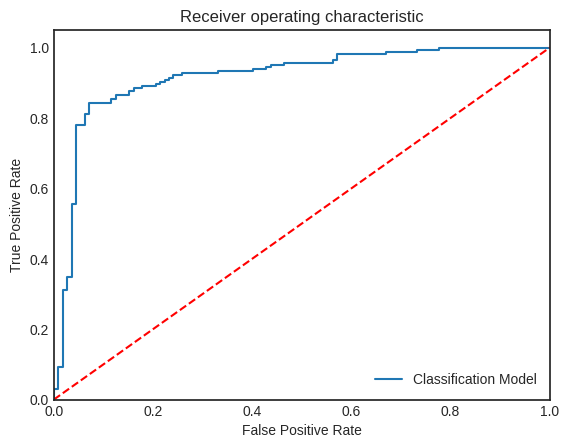

--------------------------------------------------------------------


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier( n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelGNB]
for models in MM:    
    models.fit(x_train, y_train) # Using Each Model
    y_pred = models.predict(x_test) # Using Model for Predicting
    y_pred_prob = models.predict_proba(x_test)
    
    print('Model Name: ', models)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    actual = y_test
    predicted = y_pred
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)  # confusion matrix
    print('Confusion matrix : \n', matrix)
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1) # outcome values order in sklearn
    print('Outcome values : \n', tp, fn, fp, tn)
    C_Report = classification_report(actual,predicted,labels=[1,0]) # classification report for precision, recall f1-score and accuracy
    print('Classification report : \n', C_Report)
    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    #MCC : Range of values of MCC lie between -1 to +1. 
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3)) # Area under ROC curve     
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('--------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result._append(new_row, ignore_index=True)

In [152]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),136.0,28.0,11.0,101.0,0.859,0.925,0.829,0.875,0.902,0.719,0.865527,0.865
1,DecisionTreeClassifier(),112.0,52.0,31.0,81.0,0.699,0.783,0.683,0.730,0.723,0.399,0.703071,0.703
2,"(DecisionTreeClassifier(max_features='sqrt', r...",144.0,20.0,12.0,100.0,0.884,0.923,0.878,0.900,0.893,0.764,0.885453,0.886
3,"(ExtraTreeClassifier(random_state=355357536), ...",145.0,19.0,10.0,102.0,0.895,0.935,0.884,0.909,0.911,0.787,0.897430,0.898
4,KNeighborsClassifier(),137.0,27.0,13.0,99.0,0.855,0.913,0.835,0.873,0.884,0.709,0.859647,0.859
5,SVC(probability=True),148.0,16.0,15.0,97.0,0.888,0.908,0.902,0.905,0.866,0.767,0.884255,0.884
6,(DecisionTreeClassifier(random_state=154475172...,140.0,24.0,19.0,93.0,0.844,0.881,0.854,0.867,0.830,0.680,0.842008,0.842
7,([DecisionTreeRegressor(criterion='friedman_ms...,130.0,34.0,10.0,102.0,0.841,0.929,0.793,0.855,0.911,0.691,0.851699,0.852
8,LGBMClassifier(),140.0,24.0,17.0,95.0,0.851,0.892,0.854,0.872,0.848,0.696,0.850936,0.851
9,GaussianNB(),149.0,15.0,25.0,87.0,0.855,0.856,0.909,0.882,0.777,0.697,0.842661,0.843


In [61]:
result.sort_values(by=['F1 Score','Accuracy','True Positive','True Negative'],ascending=False).reset_index(drop=True).head(3)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVC(probability=True),148.0,16.0,15.0,97.0,0.888,0.908,0.902,0.905,0.866,0.767,0.884255,0.884
1,"(DecisionTreeClassifier(max_features='sqrt', r...",145.0,19.0,12.0,100.0,0.888,0.924,0.884,0.903,0.893,0.770,0.888502,0.889
2,"(ExtraTreeClassifier(random_state=1128007419),...",143.0,21.0,11.0,101.0,0.884,0.929,0.872,0.899,0.902,0.765,0.886868,0.887


#### In this Analysis, Extra Tree Classifier performed best with Balanced Accuracy of 88.7%

In [62]:
ModelET.fit(x_train,y_train)
y_pred=ModelET.predict(x_test)

In [63]:
out={'HeartFailure_Actual':y_test,'HeartFailure_Pred':y_pred}
out=pd.DataFrame(out)

In [65]:
df_bk=df_bk.merge(out,left_index=True,right_index=True)
df_bk.sample(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure,HeartFailure_Actual_x,HeartFailure_Pred_x,HeartFailure_Actual_y,HeartFailure_Pred_y
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0,0,0,0,0
355,67,M,TA,145,0,0,LVH,125,N,0.0,Flat,1,1,1,1,1
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,1,1,0,1,0
891,66,F,NAP,146,278,0,LVH,152,N,0.0,Flat,0,0,0,0,0
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1,1,1,1,1
436,58,M,ASY,116,0,0,Normal,124,N,1.0,Up,1,1,0,1,0
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1,1,1,1,1
652,59,M,TA,160,273,0,LVH,125,N,0.0,Up,1,1,0,1,0
168,58,M,ASY,135,222,0,Normal,100,N,0.0,Up,0,0,0,0,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1,1,1,1,1
